In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
data_list = []
for i in range(1,8):
    try:
        data = pd.read_csv('./fangchan/lianjia{}.csv'.format(i), encoding='gbk')
    except:
        data = pd.read_csv('./fangchan/lianjia{}.csv'.format(i))
    finally:
        data_list.append(data)

In [43]:
len(data_list)

7

In [44]:
data = pd.concat(data_list)

In [45]:
data.head()

,cjtaoshu,mendian,cjzongjia,zhiwei,haoping,cjdanjia,cjxiaoqu,xingming,cjzhouqi,biaoqian,cjlouceng,cjshijian,congyenianxian,bankuai
0,37,红莲北里店,251.0,店经理,97% 141,43997元/平,红莲北里 3室1厅 57平,郭海龙,36,房东信赖;销售达人;带看活跃,南 北/高楼层/6层,签约时间：2015-05-24,4-5年,马连道
1,37,红莲北里店,159.0,店经理,97% 141,36969元/平,红莲南里 1室1厅 43平,郭海龙,36,房东信赖;销售达人;带看活跃,南/高楼层/7层,签约时间：2015-05-10,4-5年,马连道
2,37,红莲北里店,257.0,店经理,97% 141,39046元/平,常青藤嘉园 1室1厅 65平,郭海龙,36,房东信赖;销售达人;带看活跃,北/低楼层/16层,签约时间：2015-04-26,4-5年,马连道
3,37,红莲北里店,243.0,店经理,97% 141,41313元/平,红莲北里 2室1厅 58平,郭海龙,36,房东信赖;销售达人;带看活跃,南 北/高楼层/6层,签约时间：2015-04-04,4-5年,马连道
4,37,红莲北里店,372.5,店经理,97% 141,42053元/平,广安门外大街 3室1厅 88平,郭海龙,36,房东信赖;销售达人;带看活跃,东 南 西 北/中楼层/18层,签约时间：2015-04-01,4-5年,马连道


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162227 entries, 0 to 6680
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   cjtaoshu        162227 non-null  int64  
 1   mendian         162214 non-null  object 
 2   cjzongjia       162226 non-null  float64
 3   zhiwei          162226 non-null  object 
 4   haoping         162226 non-null  object 
 5   cjdanjia        162226 non-null  object 
 6   cjxiaoqu        162226 non-null  object 
 7   xingming        162226 non-null  object 
 8   cjzhouqi        162226 non-null  object 
 9   biaoqian        145553 non-null  object 
 10  cjlouceng       162226 non-null  object 
 11  cjshijian       162226 non-null  object 
 12  congyenianxian  162226 non-null  object 
 13  bankuai         160906 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 18.6+ MB


In [47]:
dj = data.cjdanjia.dropna().map(lambda x: round(float(x.replace('元/平',''))/10000, 1))

In [48]:
dj.max()

15.0

In [49]:
dj = dj[dj > 0]

In [50]:
bins = [0,1,2,3,4,5,8,10,15,16]

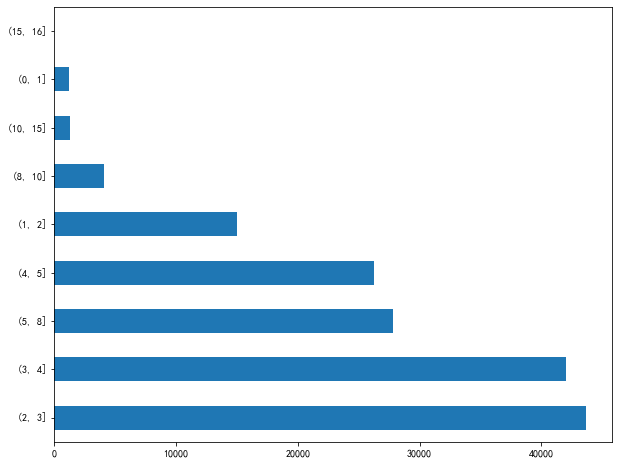

In [51]:
pd.cut(dj, bins).value_counts().plot.barh(figsize=(10, 8))

In [52]:
jjr_zongjia = data.groupby('xingming')['cjzongjia'].sum()

In [53]:
jjr_zongjia = jjr_zongjia[jjr_zongjia > 10000]

In [54]:
bj_z = data.groupby(['bankuai', 'xingming'])['cjzongjia'].sum()

In [55]:
bj_z[bj_z>10000]

bankuai  xingming
CBD      李铁岗         14532.08
         王东学         10232.70
         王辰          12742.00
七里庄      乔俊萍         16466.40
         刘淼          11794.60
                       ...   
黄村北      陆新田         16453.98
         陈盼          10758.20
黄村火车站    王增强         17893.80
龙泽       宋瑶          18462.00
         王明旭         13067.00
Name: cjzongjia, Length: 1448, dtype: float64

In [56]:
data_nx = data.pivot_table('cjzongjia', index='xingming', columns='congyenianxian',
                 aggfunc='sum')

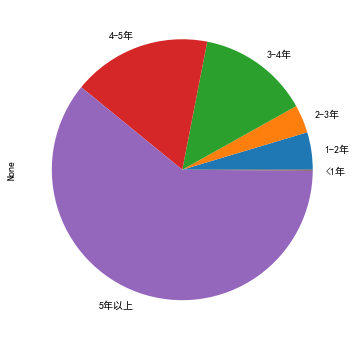

In [57]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

(data_nx > 10000).sum().plot.pie(figsize=(6,6))

In [58]:
data.bankuai.value_counts()


回龙观     6023
望京      4122
北苑      3254
天通苑     3083
顺义城     2873
        ... 
三河        11
建国门外      10
百善镇        9
海淀其它       8
农展馆        6
Name: bankuai, Length: 220, dtype: int64

In [59]:
# data['cjdanjia'] = data.cjdanjia.dropna().map(lambda x: round(float(x.replace('元/平',''))/10000, 1))
data['cjdanjia'] = data.cjdanjia.str.replace('元/平','').astype(np.float32).map(lambda x:round(x/10000,1))



In [65]:
data_1 = data.groupby('bankuai')[['cjdanjia']].mean()

In [68]:
data_1.sort_values(by='cjdanjia', ascending=False)

,cjdanjia
bankuai,
西四,9.475000
金融街,8.206412
西单,7.402358
东四,7.115152
木樨地,6.997771
...,...
李桥,2.082759
阎村,2.042857
良乡,2.037325


In [73]:
def top(group, n=5):
   return group.sort_values('cjdanjia', ascending=False)[:n]

In [79]:
data.groupby('xingming').apply(top)



cjtaoshu  mendian  cjzongjia zhiwei haoping  cjdanjia  \
xingming                                                                
丁一       48245         9     禧福汇店      250.0  高级经纪人  87% 56       5.4   
         48246         9     禧福汇店      248.0  高级经纪人  87% 56       4.1   
         48247         9     禧福汇店      166.0  高级经纪人  87% 56       3.9   
         48251         9     禧福汇店      184.0  高级经纪人  87% 56       3.7   
         48248         9     禧福汇店      181.0  高级经纪人  87% 56       3.4   
...                  ...      ...        ...    ...     ...       ...   
龚雪       19726        16  大西洋西门D店     1300.0  高级经纪人  85% 71       8.7   
         19728        16  大西洋西门D店      526.0  高级经纪人  85% 71       8.1   
         19727        16  大西洋西门D店      495.0  高级经纪人  85% 71       7.4   
         19729        16  大西洋西门D店      835.0  高级经纪人  85% 71       5.6   
         19734        16  大西洋西门D店      510.0  高级经纪人  85% 71       5.6   

                         cjxiaoqu xingming cjzhouqi biaoqian     cjlouceng  \
xingming                                                                     
丁一       48245      松榆西里 2室1厅 46平       丁一       22      NaN    南 北/高楼层/6层   
         48246     平乐园小区 2室1厅 59平       丁一       22      NaN    南 北/中楼层/6层   
         48247       松榆里 1室1厅 42平       丁一       22      NaN      南/高楼层/6层   
         48251       农光里 1室1厅 50平       丁一       22      NaN     南/中楼层/12层   
         48248      农光南路 1室1厅 52平       丁一       22      NaN     南/中楼层/18层   
...                           ...      ...      ...      ...           ...   
龚雪       19726  大西洋新城F区 3室2厅 149平       龚雪       82      NaN  东南 西北/中楼层/8层   
         19728   大西洋新城E区 1室1厅 64平       龚雪       82      NaN     东/低楼层/22层   
         19727   大西洋新城C区 2室1厅 67平       龚雪       82      NaN    东北/低楼层/28层   
         19729  大西洋新城F区 3室2厅 149平       龚雪       82      NaN    南 北/中楼层/8层   
         19734   大西洋新城E区 2室2厅 91平       龚雪       82      NaN   东 北/低楼层/23层   

                      cjshijian congyenianxian bankuai  
xingming                                                
丁一       48245  签约时间：2016-09-22           3-4年     大望路  
         48246  签约时间：2016-07-26           3-4年     大望路  
         48247  签约时间：2016-01-12           3-4年     大望路  
         48251  签约时间：2015-03-11           3-4年     大望路  
         48248  签约时间：2015-05-24           3-4年     大望路  
...                         ...            ...     ...  
龚雪       19726  签约时间：2016-09-30           5年以上      望京  
         19728  签约时间：2016-07-14           5年以上      望京  
         19727  签约时间：2016-08-28           5年以上      望京  
         19729  签约时间：2015-11-29           5年以上      望京  
         19734  签约时间：2014-07-14           5年以上      望京  

[36853 rows x 14 columns]